In [1]:
from sklearn.preprocessing import  MinMaxScaler, StandardScaler , RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
#import optuna
import lightgbm as lgb
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



**Summary:**


Used **roc_auc** instead of accuracy as the metrics(small dataset). Imbalanced dataset used SMOTE and TOMEK links on the training data which improved the model performace. Applied MinMaxscaler followed by log transform for scaling. Models used are Logistic regression, LGBM Classifier, XGB Classifier, Catboost, HIST gradient boosting, Random forest, KNN and used optuna for finding the hyperparameters. Out of the 7 models only **LGBM Classifier, HIST Gradient Boosting** and **Random Forest** gave an accuracy of ~96%.


# Reading the dataset

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


from matplotlib import pyplot as plt
_df_0['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Partner').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('PhoneService').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Partner')):
  _plot_series(series, series_name, i)
  fig.legend(title='Partner', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Dependents')):
  _plot_series(series, series_name, i)
  fig.legend(title='Dependents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('PhoneService')):
  _plot_series(series, series_name, i)
  fig.legend(title='PhoneService', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
_df_11['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Partner'].value_counts()
    for x_label, grp in _df_13.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('Partner')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dependents'].value_counts()
    for x_label, grp in _df_14.groupby('Partner')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Partner')
_ = plt.ylabel('Dependents')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PhoneService'].value_counts()
    for x_label, grp in _df_15.groupby('Dependents')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Dependents')
_ = plt.ylabel('PhoneService')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MultipleLines'].value_counts()
    for x_label, grp in _df_16.groupby('PhoneService')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PhoneService')
_ = plt.ylabel('MultipleLines')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='tenure', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Partner'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='tenure', y='Partner', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Dependents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='tenure', y='Dependents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['PhoneService'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='tenure', y='PhoneService', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


from matplotlib import pyplot as plt
_df_21['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='SeniorCitizen', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['SeniorCitizen'].plot(kind='line', figsize=(8, 4), title='SeniorCitizen')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
df.drop(['customerID','Churn',],axis=1).nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

In [9]:
df = df.drop('customerID',axis=1)

# Preprocessing

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [11]:
cols_to_dummies = df.drop('Churn',axis=1).select_dtypes('object').columns
cols_to_dummies

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [12]:
df = pd.get_dummies(data=df,columns=cols_to_dummies, drop_first=True,dtype=int)

In [13]:
from scipy.stats import skew, kurtosis

numeric_cols = df.select_dtypes(include=['float', 'int']).columns
non_numeric_cols = df.select_dtypes(exclude=['float', 'int']).columns
num_df = df[numeric_cols]


skewness = num_df.apply(skew)
kurt = num_df.apply(kurtosis)

print("Skewness:\n",skewness)
print("Kurtosis:\n",kurt)

Skewness:
 SeniorCitizen                            1.833242
tenure                                   0.239489
MonthlyCharges                          -0.220477
TotalCharges                             0.963029
gender_Male                             -0.019027
Partner_Yes                              0.067908
Dependents_Yes                           0.875012
PhoneService_Yes                        -2.726572
MultipleLines_No phone service           2.726572
MultipleLines_Yes                        0.316543
InternetService_Fiber optic              0.243442
InternetService_No                       1.375476
OnlineSecurity_No internet service       1.375476
OnlineSecurity_Yes                       0.943521
OnlineBackup_No internet service         1.375476
OnlineBackup_Yes                         0.652678
DeviceProtection_No internet service     1.375476
DeviceProtection_Yes                     0.657310
TechSupport_No internet service          1.375476
TechSupport_Yes                        

<Axes: >

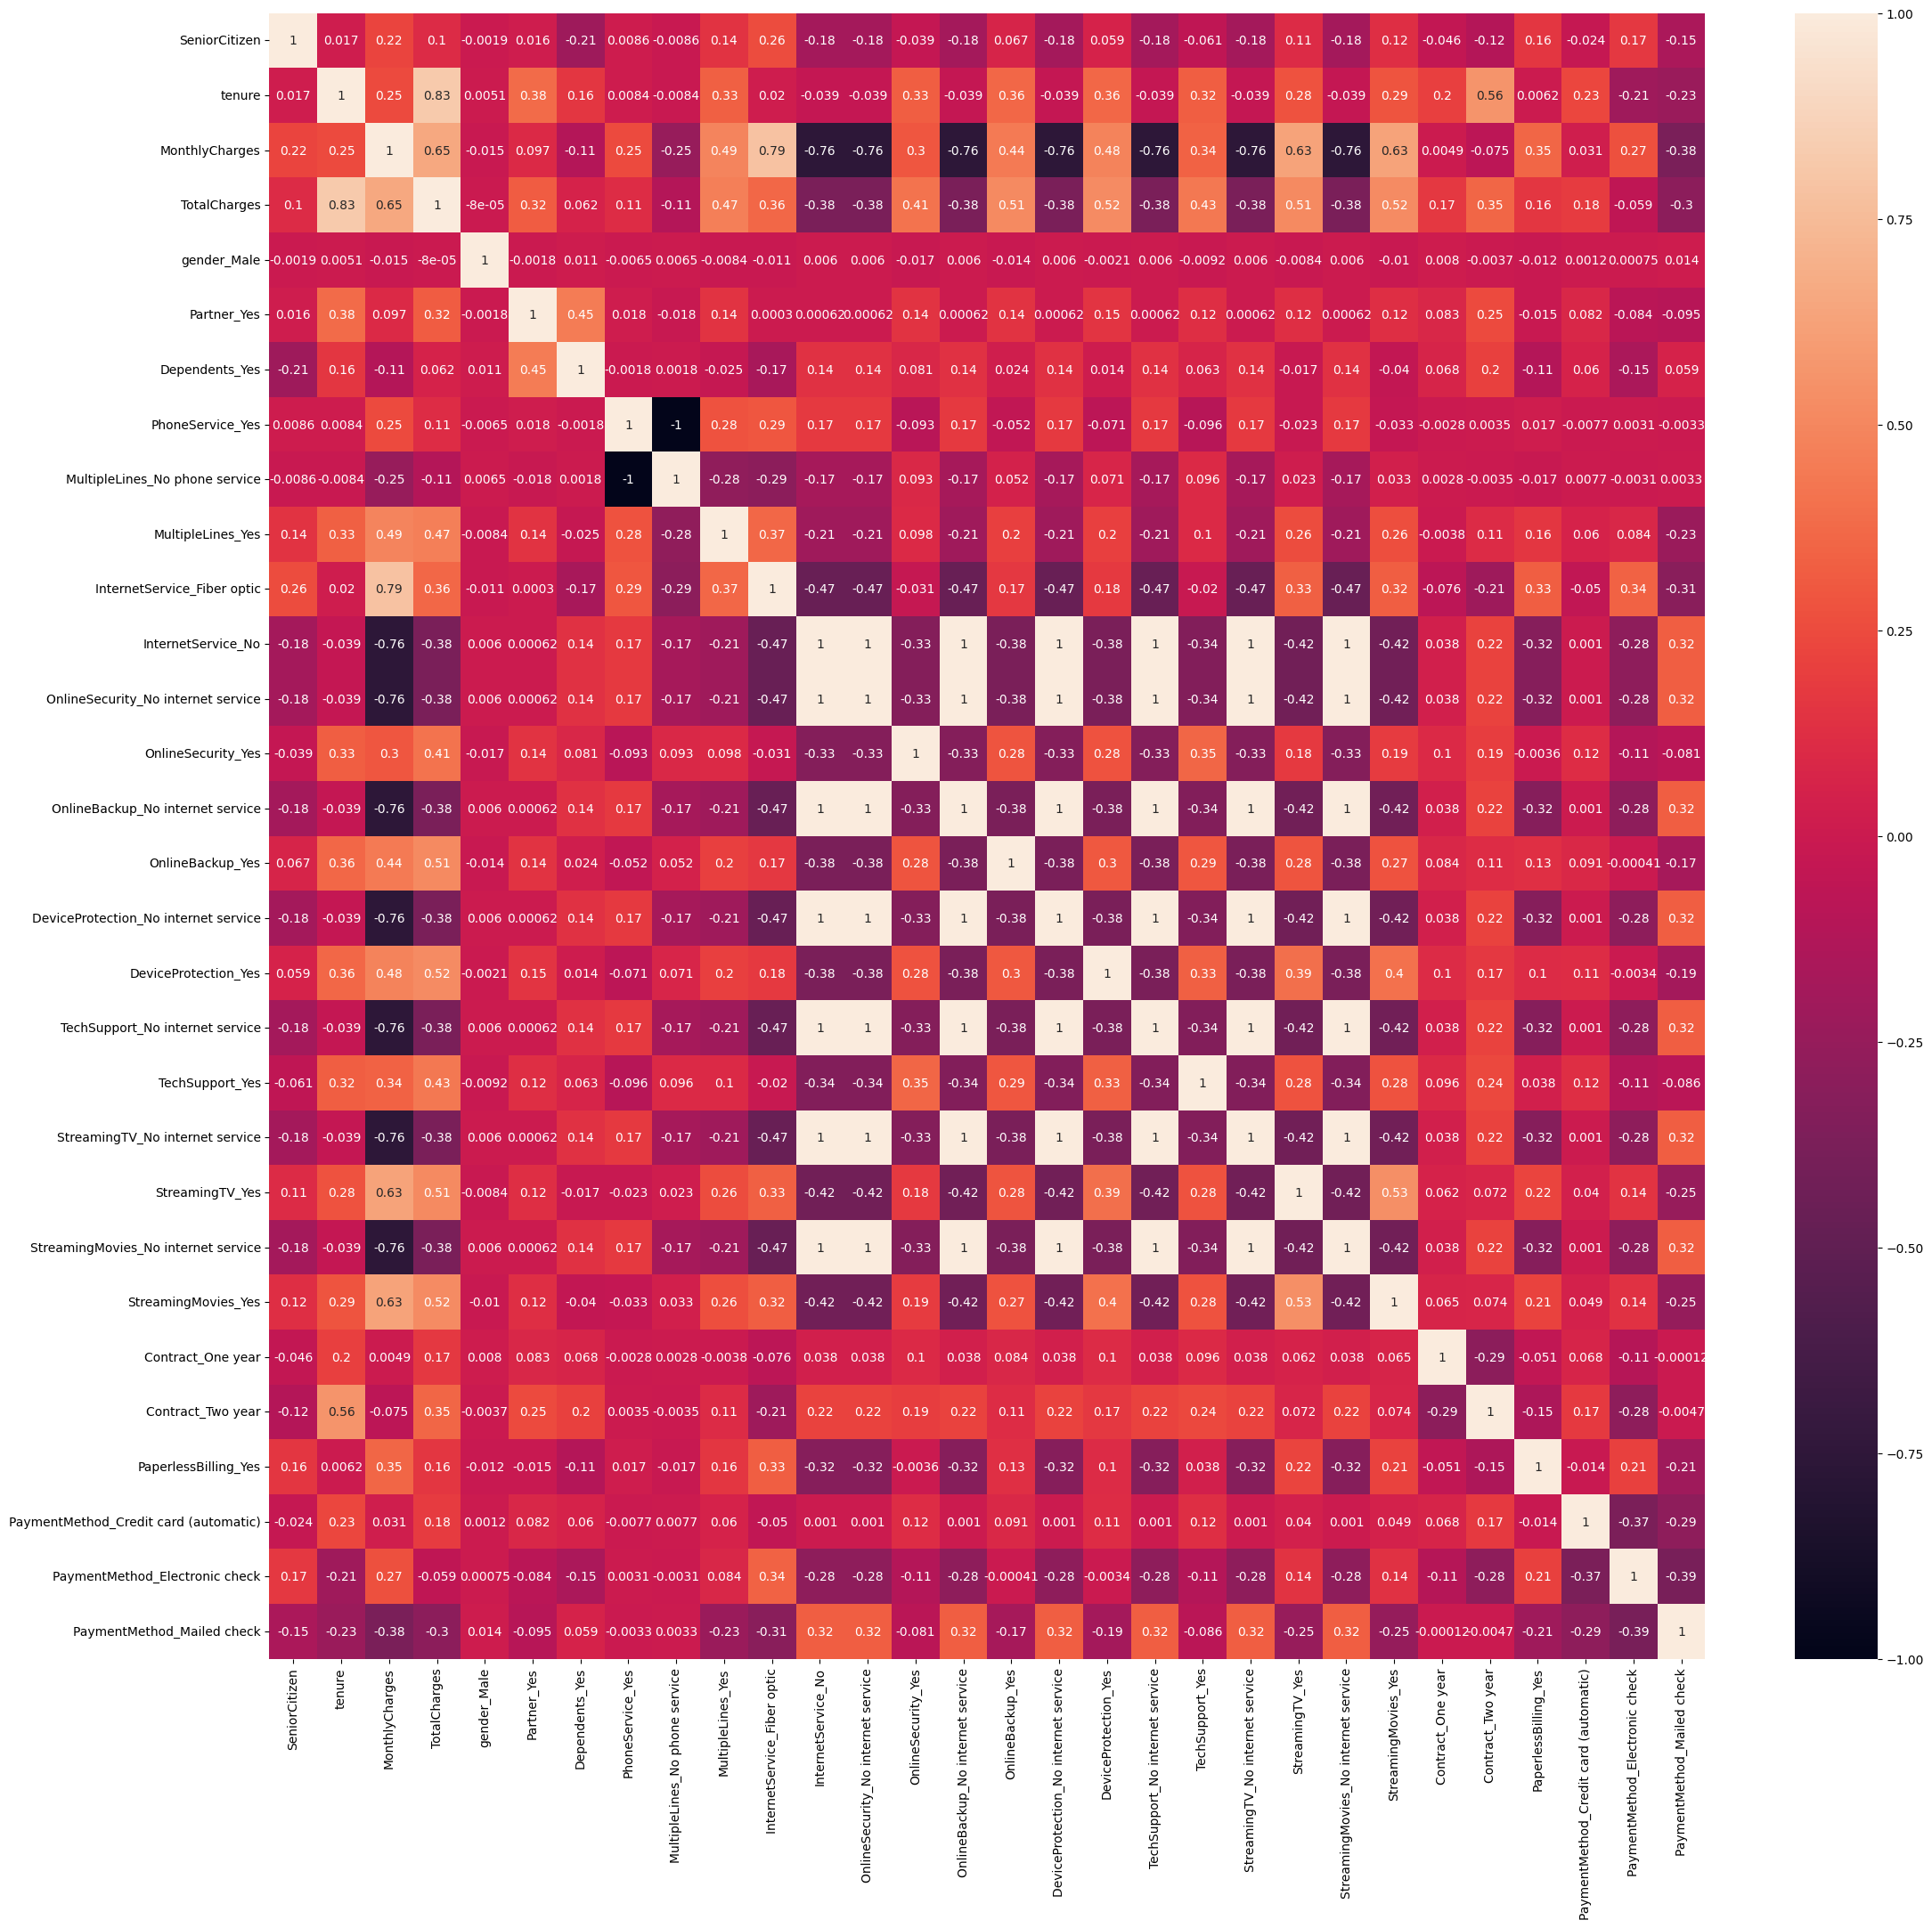

In [14]:
plt.figure(figsize=(26,24))
sns.heatmap(df.select_dtypes(['int64','float64']).corr(),annot=True)

# Modeling

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler

def log_transform(X):
    return np.log1p(X)

pipeline = Pipeline([
    ('minmax_scale', MinMaxScaler()),
    ('log_transform', FunctionTransformer(log_transform))
])


In [16]:
def tomek_links (X,y) :

    tl = TomekLinks(sampling_strategy='auto')

    X_resampled, y_resampled = tl.fit_resample(X, y)

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

    return X_resampled , y_resampled



In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn',axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print('Before TOMEK Shape=',len(X_train))
print(y_train.value_counts())

Before TOMEK Shape= 5634
No     4138
Yes    1496
Name: Churn, dtype: int64


In [19]:
X_train, y_train = tomek_links (X,y)

In [20]:
map_ = {'Yes':1,'No':0}
y_train = y_train.map(map_)
y_test = y_test.map(map_)

In [21]:
print('After TOMEK Shape=',len(X_train))
y_train.value_counts()

After TOMEK Shape= 9206


0    4603
1    4603
Name: Churn, dtype: int64

In [22]:
X_train_log = pipeline.fit_transform(X_train)
X_test_log = pipeline.transform(X_test)

In [23]:
X_train_log

array([[0.        , 0.01379332, 0.1092336 , ..., 0.        , 0.69314718,
        0.        ],
       [0.        , 0.38677298, 0.32575402, ..., 0.        , 0.        ,
        0.69314718],
       [0.        , 0.02739897, 0.30323218, ..., 0.        , 0.        ,
        0.69314718],
       ...,
       [0.        , 0.01379332, 0.50683809, ..., 0.        , 0.69314718,
        0.        ],
       [0.        , 0.189242  , 0.5802436 , ..., 0.        , 0.69314718,
        0.        ],
       [0.        , 0.01379332, 0.41536385, ..., 0.        , 0.        ,
        0.69314718]])

In [24]:
X_test_log

array([[0.        , 0.01379332, 0.06313829, ..., 0.        , 0.69314718,
        0.        ],
       [0.        , 0.4507217 , 0.06733312, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.54361545, 0.01088581, ..., 0.        , 0.        ,
        0.69314718],
       ...,
       [0.        , 0.21197025, 0.01628459, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.67209377, 0.22771022, ..., 0.69314718, 0.        ,
        0.        ],
       [0.        , 0.01379332, 0.12252578, ..., 0.        , 0.        ,
        0.69314718]])

**LogR**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

logmodel = LogisticRegression(solver='lbfgs', max_iter=1200)
logmodel.fit(X_train_log, y_train)
predictions_log = logmodel.predict_proba(X_test_log)[:,1]
roc_auc = roc_auc_score(y_test,predictions_log)
print('log_r roc_auc(log): ',roc_auc)

log_r roc_auc(log):  0.8540491372260809


In [26]:
predictions_logr_ = (predictions_log > 0.6).astype(int)
class_report_logr = classification_report(y_test, predictions_logr_)
print("Classification Report:")
print(class_report_logr)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.67      0.64       373

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



In [27]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logmodel, X_train_log, y_train, cv=kfold, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)

Cross-validation ROC AUC scores: [0.92212544 0.92434293 0.9185326  0.91880663 0.92330299]


**LGBM**

In [ ]:
# from sklearn.metrics import roc_auc_score

# def objective(trial):
#     lgb_params = {
#     'objective': 'binary',
#     'metric': 'auc',
#     'num_class': 1,
#     'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
#     'max_depth': trial.suggest_int('max_depth', 1, 800),
#     'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
#     'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#     'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#     'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 50),
#     'min_child_samples': trial.suggest_int('min_child_samples', 1, 50),
#     'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#     'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
#     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#     'num_leaves': trial.suggest_int('num_leaves', 10, 500),
#     'verbosity': -1
# }

#     model = lgb.LGBMClassifier(**lgb_params,force_col_wise=True,)
#     model.fit(X_train_log,y_train)

#     y_pred = model.predict_proba(X_test_log)[:,1]

#     # Evaluate ROC AUC
#     roc_auc = roc_auc_score(y_test, y_pred)
#     return  roc_auc

# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=50)

# best_params = study.best_params
# print("Best Parameters:", best_params)

In [ ]:
# import optuna.visualization as optuna_viz
# optuna_viz.plot_optimization_history(study)

In [34]:
lgbm_params_1 = {'n_estimators': 761, 'max_depth': 440, 'learning_rate': 0.06494948704979913,
                 'reg_alpha': 0.005325802880645769, 'reg_lambda': 0.25928395623872597,
                 'min_child_weight': 0.7581321965742767, 'min_child_samples': 17,
                 'subsample': 0.7232041763778796, 'subsample_freq': 1,
                 'colsample_bytree': 0.4521807761795655, 'num_leaves': 704,"verbosity":-1}

lgbm_classifier_1 = LGBMClassifier(**lgbm_params_1, random_state=32,)
lgbm_classifier_1.fit(X_train_log,y_train)
predictions_lgbm_1 = lgbm_classifier_1.predict_proba(X_test_log)[:, 1]
roc_auc = roc_auc_score(y_test,predictions_lgbm_1)
print('lgbm roc_auc: ',roc_auc)

lgbm roc_auc:  0.9868060803047398


In [36]:
predictions_lgbm_ = (predictions_lgbm_1 > 0.7).astype(int)
class_report_lgbm = classification_report(y_test, predictions_lgbm_)
print("Classification Report LGBM:")
print(class_report_lgbm)

Classification Report LGBM:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1036
           1       0.91      0.98      0.94       373

    accuracy                           0.97      1409
   macro avg       0.95      0.97      0.96      1409
weighted avg       0.97      0.97      0.97      1409



In [37]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lgbm_classifier_1, X_train_log, y_train, cv=kfold, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)

Cross-validation ROC AUC scores: [0.93584655 0.92898139 0.92700285 0.92544657 0.9344082 ]


<Axes: xlabel='Importance', ylabel='Feature'>

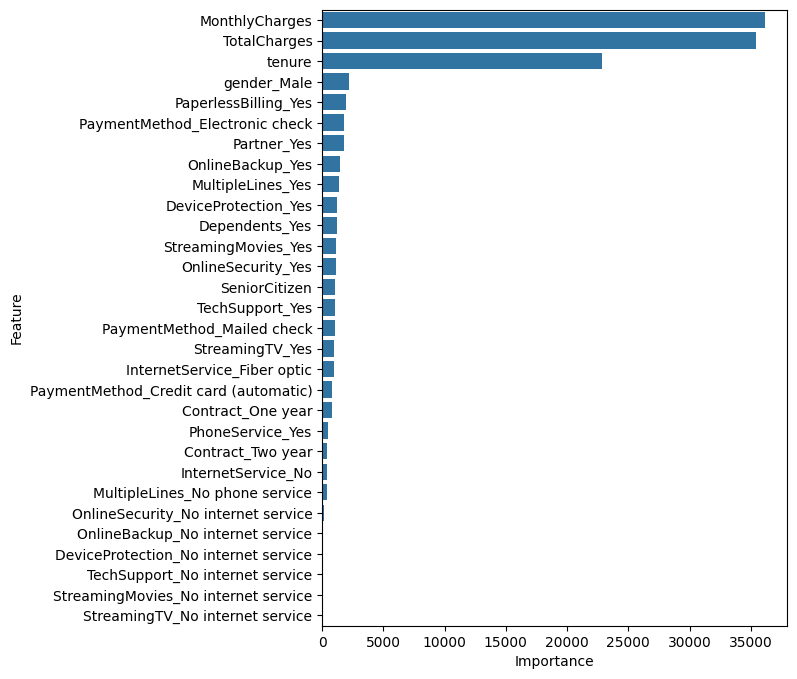

In [38]:
columns_pca = X_train.columns

feature_importance = lgbm_classifier_1.feature_importances_
feature_importance_df = pd.DataFrame({
   'Feature': columns_pca,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(6, 8))
sns.barplot(y=feature_importance_df['Feature'],x=feature_importance_df['Importance'],data=feature_importance_df)

**XGB**

In [ ]:
# def objective(trial):
#     xgb_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 0, 1000),
#         'max_depth': trial.suggest_int('max_depth', 1, 200),
#         'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'gamma': trial.suggest_float('gamma', 0.0, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#         'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
#         'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 100),
#         'max_delta_step': trial.suggest_float('max_delta_step', 0.1, 100),
#         'min_split_loss': trial.suggest_float('min_split_loss', 0.0, 1.0),
#         'lambda': trial.suggest_float('lambda', 0.0, 1.0),
#         'alpha': trial.suggest_float('alpha', 0.0, 1.0),
#      }


#     # Train XGBoost model
#     model = XGBClassifier(**xgb_params)
#     model.fit(X_train_log, y_train)

#     y_pred = model.predict_proba(X_test_log)[:,1]

#     # Evaluate log loss
#     roc_auc = roc_auc_score(y_test, y_pred)
#     return roc_auc  # Optuna

# study = optuna.create_study(direction='maximize')  # Use 'minimize' for log loss

# study.optimize(objective, n_trials=20)

# best_params = study.best_params
# print("Best Parameters:", best_params)

In [ ]:
# import optuna.visualization as optuna_viz
# optuna_viz.plot_optimization_history(study)

In [42]:
xgb_params_1 = {'n_estimators': 710, 'max_depth': 396, 'min_child_weight': 6.701183051451496,
                'learning_rate': 0.026676087502806502, 'subsample': 0.8495695973697881,
                'gamma': 0.6152593330262623, 'colsample_bytree': 0.38222797489425975,
                'colsample_bylevel': 0.357244623613023, 'colsample_bynode': 0.792490975286392,
                'reg_alpha': 0.5812620866048983, 'reg_lambda': 0.37030134449615004,
                'scale_pos_weight': 0.6040507737125296, 'max_delta_step': 16.87096589724198,
                'min_split_loss': 0.5400536255411681, 'lambda': 0.44693587004990476,
                'alpha': 0.019312448258408388}
xgb_classifier_1 = XGBClassifier(**xgb_params_1,random_state=42)
xgb_classifier_1.fit(X_train_log,y_train)
predictions_xgb = xgb_classifier_1.predict_proba(X_test_log)[:,1]
roc_auc = roc_auc_score(y_test,predictions_lgbm_1)
print('xgb roc_auc: ',roc_auc)

xgb roc_auc:  0.9868060803047398


In [50]:
predictions_xgb_ = (predictions_xgb > 0.7).astype(int)
class_report_xgb = classification_report(y_test, predictions_xgb_)
print("Classification Report for XGB:")
print(class_report_xgb)

Classification Report for XGB:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1036
           1       0.73      0.40      0.51       373

    accuracy                           0.80      1409
   macro avg       0.77      0.67      0.70      1409
weighted avg       0.79      0.80      0.78      1409



In [43]:
cv_scores = cross_val_score(lgbm_classifier_1, X_train_log, y_train, cv=kfold, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)

Cross-validation ROC AUC scores: [0.93584655 0.92898139 0.92700285 0.92544657 0.9344082 ]


<Axes: xlabel='Importance', ylabel='Feature'>

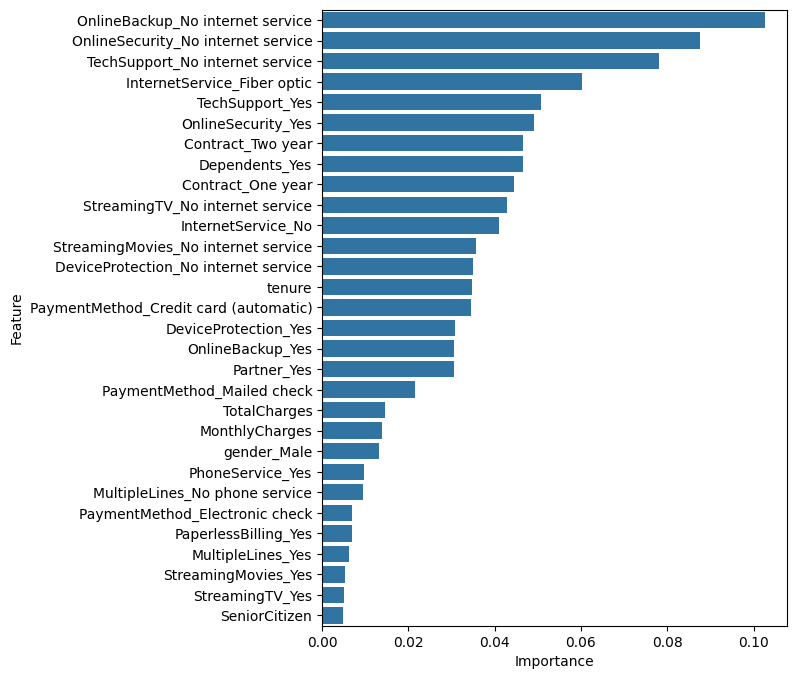

In [44]:
columns_pca = X_train.columns

feature_importance = xgb_classifier_1.feature_importances_
feature_importance_df = pd.DataFrame({
   'Feature': columns_pca,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(6, 8))
sns.barplot(y=feature_importance_df['Feature'],x=feature_importance_df['Importance'],data=feature_importance_df)

**HIST**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# def objective(trial):
#     hgb_params = {
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'max_iter': trial.suggest_int('max_iter', 100, 1000),
#         'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 31, 64),
#         'max_depth': trial.suggest_int('max_depth', 1, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
#         'l2_regularization': trial.suggest_float('l2_regularization', 0.0, 1.0),
#         'max_bins': trial.suggest_int('max_bins', 2, 225),
#         'random_state': 42  # You can change or remove this depending on your preference
#     }

#     # Train HistGradientBoostingClassifier model
#     model = HistGradientBoostingClassifier(**hgb_params)
#     model.fit(X_train_log, y_train)

#     # Get predicted probabilities for positive class
#     y_pred_proba = model.predict_proba(X_test_log)[:, 1]

#     # Evaluate ROC AUC
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
#     return roc_auc

# # Create Optuna study and optimize
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)

# # Get the best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

In [45]:
# optuna_viz.plot_optimization_history(study)

In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_params_1 = {'learning_rate': 0.07658122403991667, 'max_iter': 759, 'max_leaf_nodes': 42, 'max_depth': 16,
                 'min_samples_leaf': 8, 'l2_regularization': 0.5547180338955557, 'max_bins': 151}
hist_classifier_1 = HistGradientBoostingClassifier(**hist_params_1 , random_state=42,)
hist_classifier_1.fit(X_train_log, y_train)
predictions_hist = hist_classifier_1.predict_proba(X_test_log)[:,1]
roc_auc = roc_auc_score(y_test,predictions_hist)
print('hist roc_auc: ',roc_auc)

hist roc_auc:  0.9860258573395303


In [47]:
cv_scores = cross_val_score(hist_classifier_1, X_train_log, y_train, cv=kfold, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)

Cross-validation ROC AUC scores: [0.93470844 0.92896958 0.92710855 0.92795088 0.93481312]


In [51]:
predictions_hist_ = (predictions_hist > 0.5).astype(int)
class_report_hist = classification_report(y_test, predictions_hist_)
print("Classification Report hist:")
print(class_report_hist)

Classification Report hist:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1036
           1       0.86      0.98      0.92       373

    accuracy                           0.95      1409
   macro avg       0.92      0.96      0.94      1409
weighted avg       0.96      0.95      0.95      1409



**RandomForest**

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#import optuna

# def objective(trial):
#     rf_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'max_depth': trial.suggest_int('max_depth', 5, 30),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         'max_features': trial.suggest_float('max_features', 0.1, 1.0),
#         'random_state': 42
#     }

#     # Train RandomForestClassifier model
#     model = RandomForestClassifier(**rf_params)
#     model.fit(X_train_log, y_train)

#     # Get predicted probabilities for positive class
#     y_pred_proba = model.predict_proba(X_test_log)[:, 1]

#     # Evaluate ROC AUC
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
#     return roc_auc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=20)

# # Get the best parameters
# best_params = study.best_params
# print("Best Parameters:", best_params)

In [53]:
# optuna_viz.plot_optimization_history(study)

In [57]:
from sklearn.ensemble import RandomForestClassifier


rf_params_1 = {'n_estimators': 153, 'max_depth': 60, 'min_samples_split': 2,
               'min_samples_leaf': 1, 'max_features': 0.40243606101760657}

rf_classifier_1 = RandomForestClassifier(**rf_params_1 , random_state=62,)
rf_classifier_1.fit(X_train_log, y_train)
predictions_rf = rf_classifier_1.predict_proba(X_test_log)[:,1]
roc_auc = roc_auc_score(y_test,predictions_rf)
print('randomforest roc_auc: ',roc_auc)

randomforest roc_auc:  0.9907136646412787


In [58]:
cv_scores = cross_val_score(rf_classifier_1, X_train_log, y_train, cv=kfold, scoring='roc_auc')
print("Cross-validation ROC AUC scores:", cv_scores)

Cross-validation ROC AUC scores: [0.9319641  0.92984804 0.92832568 0.92563288 0.93652075]


In [60]:
predictions_rf_ = (predictions_rf > 0.6).astype(int)
class_report_rf = classification_report(y_test, predictions_rf_)
print("Classification Report Random forest:")
print(class_report_rf)

Classification Report Random forest:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1036
           1       0.92      0.98      0.95       373

    accuracy                           0.97      1409
   macro avg       0.95      0.98      0.96      1409
weighted avg       0.97      0.97      0.97      1409



# Ensemble Testing

In [80]:
from sklearn.ensemble import VotingClassifier

model1 = xgb_classifier_1
model2 = lgbm_classifier_1
model3 = logmodel
model4 = hist_classifier_1
model5 = rf_classifier_1



ensemble_model = VotingClassifier(estimators=
[#('model1', model1),
                                     ('model2', model2),
                                             # ('model3', model3),
                                              ('model4', model4),
                                             ('model5', model5),],voting='soft')

In [81]:
ensemble_model.fit(X_train_log,y_train)
ensemble_predictions = ensemble_model.predict_proba(X_test_log)[:, 1]
roc_auc = roc_auc_score(y_test,ensemble_predictions)
print('Ensemble roc_auc: ',roc_auc)

Ensemble roc_auc:  0.9903746622915524


In [84]:
ensemble_predictions_soft = (ensemble_predictions > 0.80).astype(int)
ensemble_predictions_soft_class_report_ = classification_report(y_test, ensemble_predictions_soft)
print("Classification Report FOR ENSEMBLE TESTING:\n")
print(ensemble_predictions_soft_class_report_)

Classification Report FOR ENSEMBLE TESTING:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1036
           1       0.94      0.93      0.94       373

    accuracy                           0.97      1409
   macro avg       0.96      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

